In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


607

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | butaritari
Processing Record 3 of Set 13 | bathsheba
Processing Record 4 of Set 13 | felidhoo
City not found. Skipping...
Processing Record 5 of Set 13 | kapaa
Processing Record 6 of Set 13 | nisia floresta
Processing Record 7 of Set 13 | kropotkin
Processing Record 8 of Set 13 | lakes entrance
Processing Record 9 of Set 13 | birjand
Processing Record 10 of Set 13 | barrow
Processing Record 11 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 13 | khatanga
Processing Record 13 of Set 13 | san cristobal
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | castro
Processing Record 17 of Set 13 | tianjin
Processing Record 18 of Set 13 | longyearbyen
Processing Record 19 of Set 13 | bolungarvik
City not found. Skipping...
Processing Record 20 of Set 13 | knysna
Processin

Processing Record 32 of Set 16 | canon city
Processing Record 33 of Set 16 | yasugi
Processing Record 34 of Set 16 | irsha
Processing Record 35 of Set 16 | varazze
Processing Record 36 of Set 16 | ust-maya
Processing Record 37 of Set 16 | agadez
Processing Record 38 of Set 16 | dingle
Processing Record 39 of Set 16 | jasper
Processing Record 40 of Set 16 | whitehorse
Processing Record 41 of Set 16 | cedral
Processing Record 42 of Set 16 | mvomero
Processing Record 43 of Set 16 | tahta
Processing Record 44 of Set 16 | makakilo city
Processing Record 45 of Set 16 | ancud
Processing Record 46 of Set 16 | buala
Processing Record 47 of Set 16 | ardakan
Processing Record 48 of Set 16 | syracuse
Processing Record 49 of Set 16 | puerto ayora
Processing Record 50 of Set 16 | booue
Processing Record 1 of Set 17 | buarcos
Processing Record 2 of Set 17 | qandala
Processing Record 3 of Set 17 | port blair
Processing Record 4 of Set 17 | faya
Processing Record 5 of Set 17 | uwayl
City not found. Ski

Processing Record 19 of Set 20 | pyapon
Processing Record 20 of Set 20 | burley
Processing Record 21 of Set 20 | verkhniy landekh
Processing Record 22 of Set 20 | nelson bay
Processing Record 23 of Set 20 | saskylakh
Processing Record 24 of Set 20 | kavaratti
Processing Record 25 of Set 20 | moss point
Processing Record 26 of Set 20 | priladozhskiy
Processing Record 27 of Set 20 | zhenlai
Processing Record 28 of Set 20 | salalah
Processing Record 29 of Set 20 | zinder
Processing Record 30 of Set 20 | ruatoria
City not found. Skipping...
Processing Record 31 of Set 20 | usinsk
Processing Record 32 of Set 20 | magaria
Processing Record 33 of Set 20 | juifang
City not found. Skipping...
Processing Record 34 of Set 20 | hobyo
Processing Record 35 of Set 20 | inderborskiy
City not found. Skipping...
Processing Record 36 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 20 | san patricio
Processing Record 38 of Set 20 | korla
Processing Record 39 of Set 20 | co

Processing Record 6 of Set 24 | kathu
Processing Record 7 of Set 24 | krasnogorskoye
Processing Record 8 of Set 24 | pacific grove
Processing Record 9 of Set 24 | kenai
Processing Record 10 of Set 24 | karasjok
Processing Record 11 of Set 24 | kruisfontein
Processing Record 12 of Set 24 | los llanos de aridane
Processing Record 13 of Set 24 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 24 | warqla
City not found. Skipping...
Processing Record 15 of Set 24 | mareeba
Processing Record 16 of Set 24 | serra talhada
Processing Record 17 of Set 24 | terra santa
Processing Record 18 of Set 24 | zaozerne
Processing Record 19 of Set 24 | saint-joseph
Processing Record 20 of Set 24 | killybegs
Processing Record 21 of Set 24 | kaspiysk
Processing Record 22 of Set 24 | juarez
Processing Record 23 of Set 24 | gornopravdinsk
Processing Record 24 of Set 24 | miandrivazo
Processing Record 25 of Set 24 | hays
Processing Record 26 of Set 24 | ekhabi
Processing Record 27 of Set 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,67.05,83,14,6.53,AU,2022-02-05 22:52:29
1,Butaritari,3.0707,172.7902,82.74,73,43,18.77,KI,2022-02-05 22:56:50
2,Bathsheba,13.2167,-59.5167,79.41,69,20,10.36,BB,2022-02-05 22:56:51
3,Kapaa,22.0752,-159.3190,80.19,66,0,1.99,US,2022-02-05 22:52:31
4,Nisia Floresta,-6.0911,-35.2086,81.41,74,11,9.17,BR,2022-02-05 22:56:51
5,Kropotkin,45.4375,40.5756,24.49,90,27,5.19,RU,2022-02-05 22:56:52
6,Lakes Entrance,-37.8811,147.9810,69.17,62,24,8.41,AU,2022-02-05 22:56:52
7,Birjand,32.8663,59.2211,36.07,93,40,0.00,IR,2022-02-05 22:56:53
8,Barrow,71.2906,-156.7887,-18.89,96,99,12.55,US,2022-02-05 22:56:53
9,Khatanga,71.9667,102.5000,-21.73,97,99,3.53,RU,2022-02-05 22:56:54


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

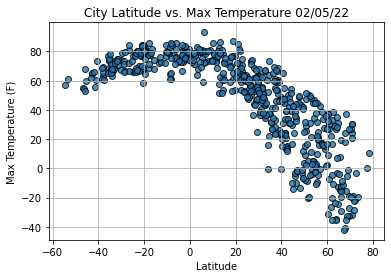

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

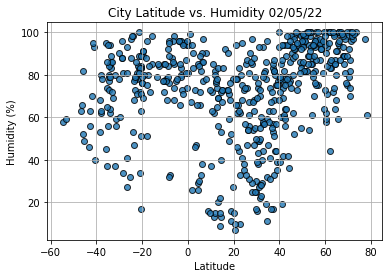

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

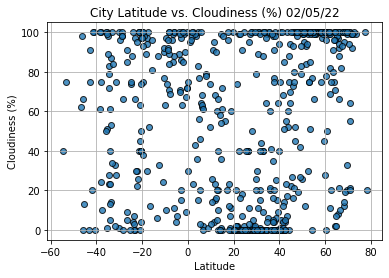

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

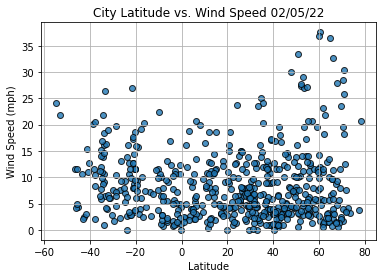

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]

index13

City                       Castro
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    65.62
Humidity                       97
Cloudiness                     74
Wind Speed                   7.09
Country                        BR
Date          2022-02-05 22:54:28
Name: 13, dtype: object

In [16]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
556     True
557     True
558     True
559     True
560    False
Name: Lat, Length: 561, dtype: bool

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Butaritari,3.0707,172.7902,82.74,73,43,18.77,KI,2022-02-05 22:56:50
2,Bathsheba,13.2167,-59.5167,79.41,69,20,10.36,BB,2022-02-05 22:56:51
3,Kapaa,22.0752,-159.3190,80.19,66,0,1.99,US,2022-02-05 22:52:31
5,Kropotkin,45.4375,40.5756,24.49,90,27,5.19,RU,2022-02-05 22:56:52
7,Birjand,32.8663,59.2211,36.07,93,40,0.00,IR,2022-02-05 22:56:53


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

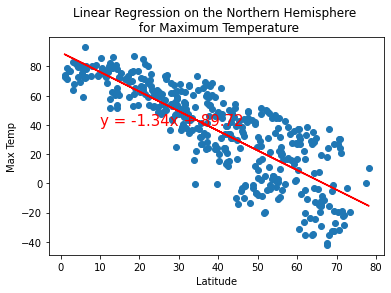

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

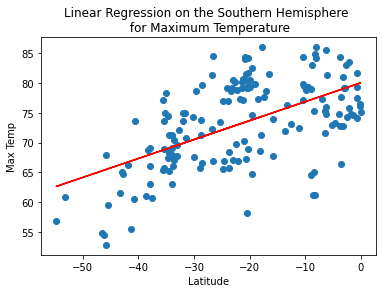

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

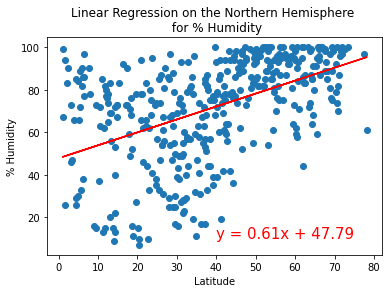

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

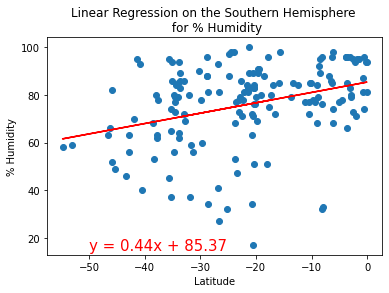

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

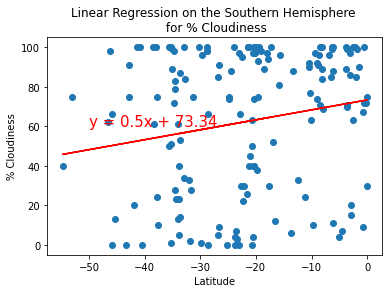

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

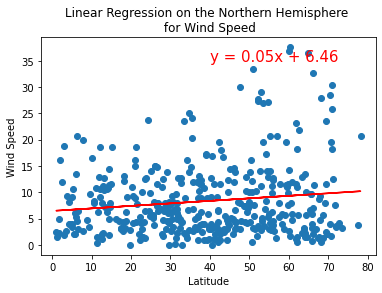

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


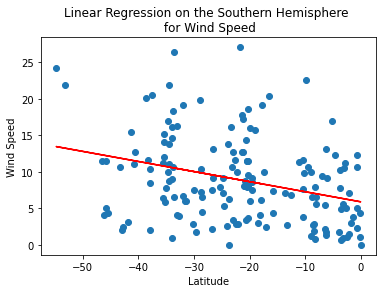

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))